In [15]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "fashion-mnist_test.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zalando-research/fashionmnist",
  file_path,
)

/tmp/ipython-input-1894780179.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'fashionmnist' dataset.


In [13]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


xtrain, xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, random_state=42)

xtrain = xtrain/255
xtest = xtest/255

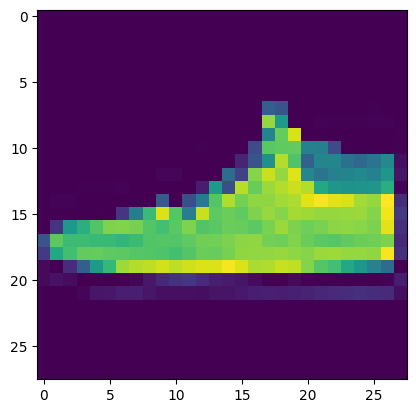

In [25]:
plt.imshow(xtrain.iloc[9, :].values.reshape(28,28))

In [3]:
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:
class mnistANN(nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            # nn.Softmax() no need to write as nn.CrossEntropyLoss will apply softmax and then calculate neg log likelihood loss
        )
    
    def forward(self, features):
        return self.network(features)

In [41]:
xtrain_tensor = torch.from_numpy(xtrain.values).float()
xtest_tensor = torch.from_numpy(xtest.values).float()
ytrain_tensor = torch.from_numpy(ytrain.values).float()
ytest_tensor = torch.from_numpy(ytest.values).float()

In [42]:
traindataset = CustomDataset(xtrain_tensor, ytrain_tensor)

In [43]:
traindataloader = DataLoader(traindataset, batch_size=100, shuffle=True)

In [94]:
learning_rate = 0.1
epochs = 100

model = mnistANN(num_features=xtrain.shape[1])

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):

    epoch_loss = 0
    
    for batch_features, batch_labels in traindataloader:

        ypred = model(batch_features)

        loss = loss_function(ypred, batch_labels.long())

        epoch_loss += loss.item() 

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    
    print(f'epoch {epoch+1} -> loss {loss/(xtrain_tensor.shape[1]/100)}')

epoch 1 -> loss 0.12353703379631042
epoch 2 -> loss 0.11922573298215866
epoch 3 -> loss 0.09419023990631104
epoch 4 -> loss 0.09001873433589935
epoch 5 -> loss 0.058838989585638046
epoch 6 -> loss 0.081086166203022
epoch 7 -> loss 0.07443913072347641
epoch 8 -> loss 0.07778101414442062
epoch 9 -> loss 0.05945557355880737
epoch 10 -> loss 0.05488996580243111
epoch 11 -> loss 0.048369430005550385
epoch 12 -> loss 0.06796130537986755
epoch 13 -> loss 0.05737898871302605
epoch 14 -> loss 0.049661848694086075
epoch 15 -> loss 0.06215205788612366
epoch 16 -> loss 0.04853085055947304
epoch 17 -> loss 0.055366214364767075
epoch 18 -> loss 0.03574371710419655
epoch 19 -> loss 0.04127131775021553
epoch 20 -> loss 0.05032864585518837
epoch 21 -> loss 0.05422135815024376
epoch 22 -> loss 0.04647801071405411
epoch 23 -> loss 0.05456406995654106
epoch 24 -> loss 0.03728592395782471
epoch 25 -> loss 0.04801404848694801
epoch 26 -> loss 0.051299210637807846
epoch 27 -> loss 0.035918667912483215
epoch 

In [ ]:
model.eval() # helpful because certain part of NN, work differently during traing and prediction, like dropouts and batchnormalization

with torch.no_grad():
    ytest_pred = model(xtest_tensor)
    ytest_pred = ytest_pred.argmax(dim=1)

print(classification_report(ytest_tensor, ytest_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       235
         1.0       0.97      0.97      0.97       236
         2.0       0.75      0.76      0.76       254
         3.0       0.89      0.88      0.89       242
         4.0       0.81      0.80      0.81       251
         5.0       0.91      0.94      0.93       250
         6.0       0.73      0.64      0.68       257
         7.0       0.92      0.90      0.91       258
         8.0       0.95      0.96      0.96       253
         9.0       0.94      0.92      0.93       264

    accuracy                           0.86      2500
   macro avg       0.86      0.87      0.86      2500
weighted avg       0.86      0.86      0.86      2500

